<a href="https://colab.research.google.com/github/pratyashanayak/ML_projects/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle

#unpickle the file
with open(r'/content/images.p',"rb") as f:
  images=pickle.load(f)

with open(r'/content/labels.p',"rb") as f:
  labels=pickle.load(f)


In [ ]:
print(images.shape)
print(labels.shape)

(568, 100, 100)
(568,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
le.inverse_transform([0,1,2,3,4,5])

array(['Akanshya', 'Beda', 'Jay', 'Mahesh', 'Mimansha', 'Tanuj'],
      dtype='<U8')

In [ ]:
labels.shape

(568,)

In [ ]:
import numpy as np

In [ ]:
n_persons=len(set(labels))
print("Numbers of persons: ",n_persons)
label_mapping=le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i,"-->",label_mapping[i])


Numbers of persons:  6
0 --> Akanshya
1 --> Beda
2 --> Jay
3 --> Mahesh
4 --> Mimansha
5 --> Tanuj


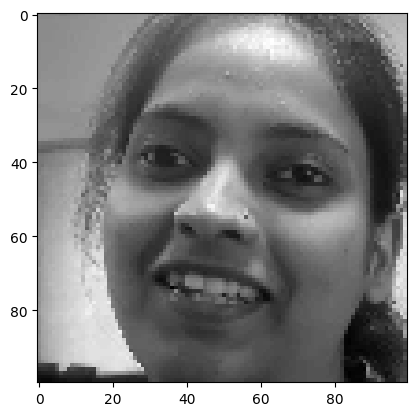

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[26],cmap=plt.get_cmap("gray"))
plt.show()


In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img


In [ ]:
images=np.array(list(map(preprocessing,images)))
print("Shape of Input: ",images.shape)

Shape of Input:  (568, 100, 100, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
categories=labels.shape[1]

In [ ]:
print(categories)

6


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def Lenet_model():
  model=Sequential()

  model.add(Conv2D(64,(3,3),input_shape=(100,100,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

 # model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(450,activation='relu'))
  model.add(Dense(6,activation='softmax'))
  model.compile(RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
model=Lenet_model()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 36864)             0         
                                                                 
 dense_12 (Dense)            (None, 450)               16589250  
                                                                 
 dense_13 (Dense)            (None, 6)                

In [ ]:
history = model.fit(images,labels,validation_split=0.1, epochs = 10, batch_size = 50, verbose = 1)

Epoch 1/10
11/11 [==============================] - 11s 942ms/step - loss: 4.3865 - accuracy: 0.5088 - val_loss: 0.9854 - val_accuracy: 0.8421
Epoch 2/10
11/11 [==============================] - 9s 855ms/step - loss: 0.3739 - accuracy: 0.9022 - val_loss: 0.2722 - val_accuracy: 0.9649
Epoch 3/10
11/11 [==============================] - 9s 808ms/step - loss: 0.1075 - accuracy: 0.9941 - val_loss: 0.1241 - val_accuracy: 0.9649
Epoch 4/10
11/11 [==============================] - 10s 941ms/step - loss: 0.1578 - accuracy: 0.9746 - val_loss: 0.2446 - val_accuracy: 0.9649
Epoch 5/10
11/11 [==============================] - 10s 945ms/step - loss: 0.0458 - accuracy: 0.9922 - val_loss: 0.2012 - val_accuracy: 0.9649
Epoch 6/10
11/11 [==============================] - 10s 929ms/step - loss: 0.0410 - accuracy: 0.9902 - val_loss: 2.4921 - val_accuracy: 0.0000e+00
Epoch 7/10
11/11 [==============================] - 9s 805ms/step - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.9866 - val_accuracy: 0.719

Text(0.5, 0, 'epoch')

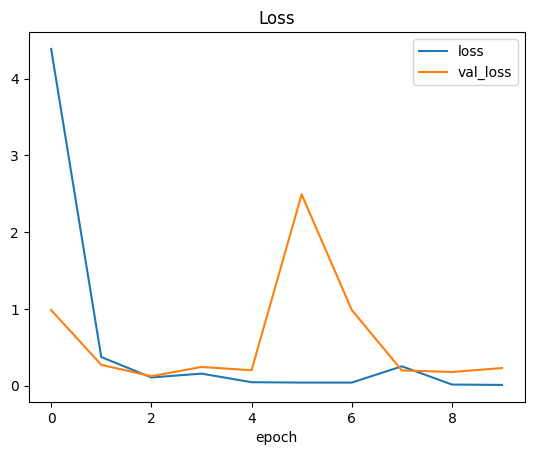

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

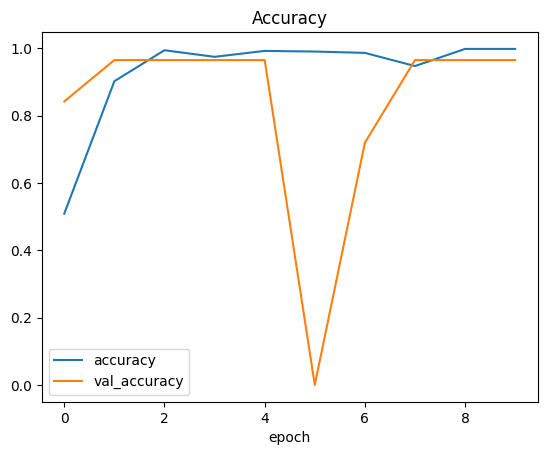

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 [==============================] - 0s 104ms/step


In [ ]:
features.shape

(1, 98, 98, 64)

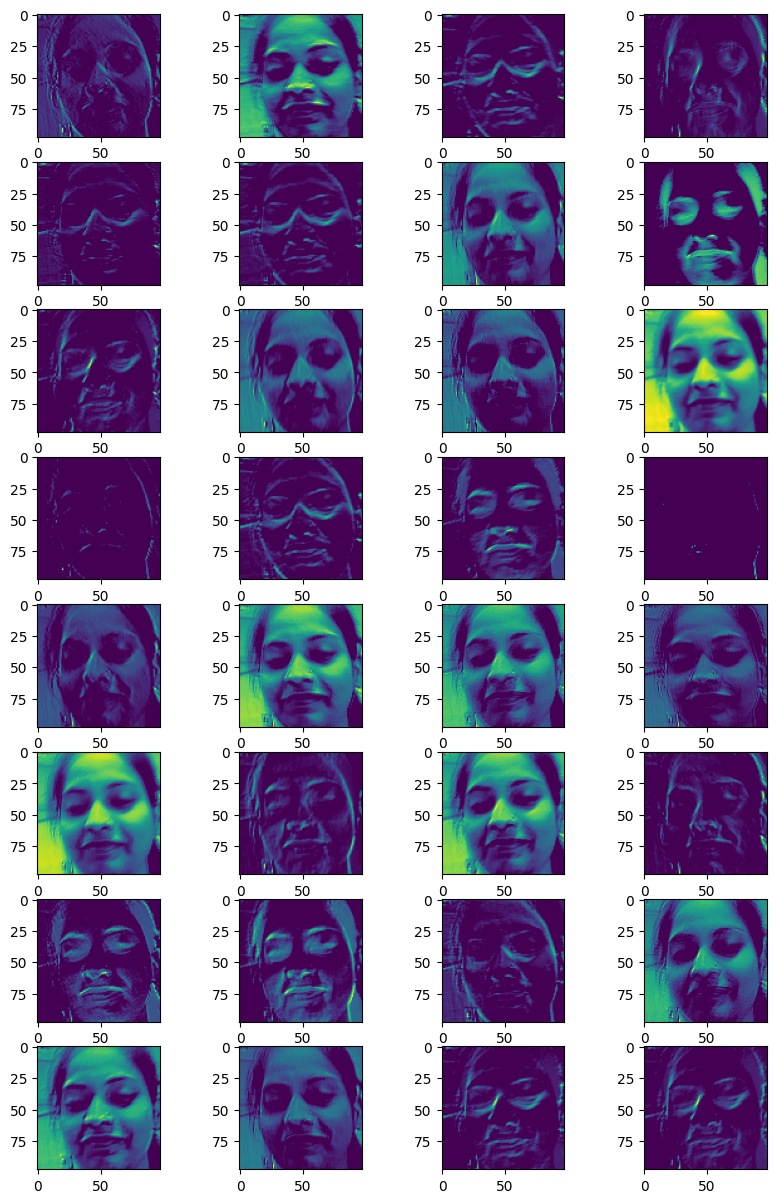

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

Saving Akanshya_0.jpg to Akanshya_0.jpg


In [ ]:
d=list(upload.keys())[0]

[255 216 255 ...  63 255 217]


<ipython-input-69-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


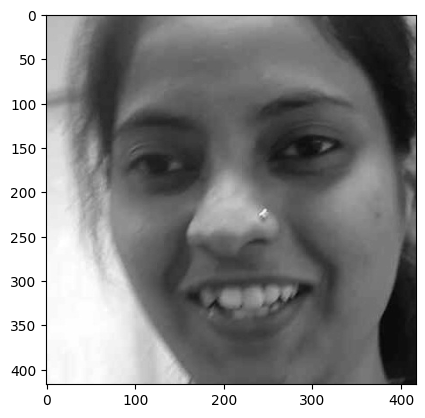

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)


In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 97ms/step
[[9.2202163e-01 1.3603269e-02 2.9678969e-02 3.1902246e-02 8.9141447e-04
  1.9024669e-03]]


In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 42ms/step


In [ ]:
p=np.argmax(prediction,axis=1)
p

array([0])

In [ ]:
model.save("final_model.h5")